<a href="https://colab.research.google.com/github/BrianGisemba/MENTAL-HEALTH-TWEETS-CLASSIFICATION/blob/data_cleaning/Mental_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [ ]:
#depression = pd.read_csv('Depression.csv')
#depression['disorder'] = 'depression'
#depression.head(5)

In [ ]:
#anxiety = pd.read_csv('anxiety.csv')
#anxiety['disorder'] = 'anxiety'
#anxiety.head(5)

In [ ]:
#paranoia = pd.read_csv('paranoia.csv')
#paranoia['disorder'] = 'paranoia'
#paranoia.head(5)

In [ ]:
#schizophrenia = pd.read_csv('schizophrenia.csv')
#schizophrenia['disorder'] = 'schizophrenia'
#schizophrenia.head(5)

In [ ]:
#dementia = pd.read_csv('dementia2010.csv')
#dementia['disorder'] = 'dementia'
#dementia.head(5)

In [ ]:
#bipolar = pd.read_csv('Bipolar2010.csv')
#bipolar['disorder'] = 'bipolar'
#bipolar.head(5)

In [ ]:
#suicidal = pd.read_csv('suicidal.csv')
#suicidal['disorder'] = 'suicidal'
#suicidal.head(5)

In [ ]:
#mentalhealth_df = pd.concat([depression, anxiety, paranoia, schizophrenia, suicidal, dementia, bipolar], axis = 0)
#mentalhealth_df

In [ ]:
#mentalhealth_df.to_csv ('MentalHealth.csv')

In [ ]:
df = pd.read_csv('MentalHealth.csv')
df.head()

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder,Unnamed: 0.1
0,0,LabanMbunya,"@CarolRadull Caroll I love Manchester United, ...","Kisii ,Kenya","A Father,A teacher at Nyakoe Highway Primary S...",451,465,2076,2016-02-16 16:23:49,0,"[{'text': 'TheGamePlan', 'indices': [90, 102]}]",depression,NaN
1,1,KhanRiak,@realmadriden Come and rescue from depression ...,"Nairobi, Kenya",Founder of Non-violence peace Ambassador. Bsc(...,692,51,118,2018-12-06 19:50:08,0,[],depression,NaN
2,2,Joekiash,"In USA you see names like Bush, Stone yet they...","Nairobi, Kenya,",#INSURANCE & Risk Management|Traveller |Rotari...,7232,9822,51742,2011-02-16 10:04:33,1,[],depression,NaN
3,3,OloloirushaK,"""Cool head"" aftermath, what a hell is wrong wi...","Narok, Kenya",doing what I like most,227,23,16,2021-05-01 09:23:34,0,[],depression,NaN
4,4,iankemboi1,@Arsenal just imagining 9 months of this and d...,Nairobi,Hardcore|Angerfist|Hardwell| Software Develope...,6699,6092,13229,2015-02-15 15:18:45,0,[],depression,NaN


# DATA CLEANING

In [ ]:
# Exploring the data 
df.shape

(749, 13)

In [ ]:
# loooking for duplicates ?
df.duplicated().sum()

0

There are no duplicates in the Tweets. 

In [ ]:
# Checking for null values
df.isna().sum()

Unnamed: 0           0
user                 0
tweet                0
location             1
description         23
friends_count        0
followers_count      0
statuses_count       0
created_at           0
retweet_count        0
hashtags             0
disorder             0
Unnamed: 0.1       687
dtype: int64

In [ ]:
# dealing with missing data.
df.drop(['description', 'Unnamed: 0.1'], 1 , inplace= True)

In [ ]:
# Droping all irrelevant collumns
droplist = ['Unnamed: 0', 'location', 'friends_count', 'user',
       'followers_count', 'statuses_count', 'retweet_count',
       'hashtags']
df.drop(droplist, axis=1, inplace=True)
df.columns

Index(['tweet', 'created_at', 'disorder'], dtype='object')

In [ ]:
# Checking the data types of the columns

df.dtypes

tweet         object
created_at    object
disorder      object
dtype: object

In [ ]:
# Changing the created_at column into time and date
df.created_at = pd.to_datetime(df.created_at)
df.dtypes

tweet                 object
created_at    datetime64[ns]
disorder              object
dtype: object

# Data Preprocessing

depression       373
anxiety          250
suicidal          64
bipolar           20
paranoia          17
schizophrenia     13
dementia          12
Name: disorder, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


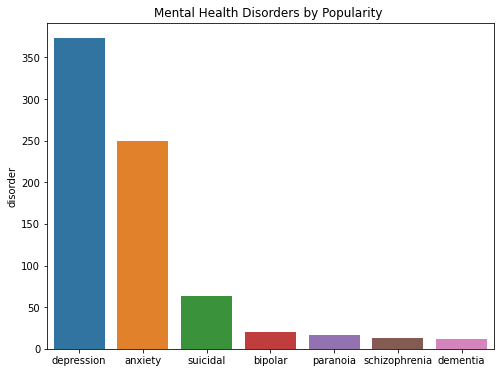

In [ ]:
x=df['disorder'].value_counts()
print(x)
plt.figure(figsize = (8,6))
plt.title('Mental Health Disorders by Popularity ')
# plt.xlabel( rotate = 45)
sns.barplot(x.index, x);


According to the hashtags the main mental health issues that kenyans are tweeting about are 
- Depression - 
Anxiety 
- Suicidal ideation 
- Bipolar and, 
- Paranoia 

In [ ]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df.head()

,tweet,created_at,disorder,year,month
0,"@CarolRadull Caroll I love Manchester United, ...",2016-02-16 16:23:49,depression,2016,2
1,@realmadriden Come and rescue from depression ...,2018-12-06 19:50:08,depression,2018,12
2,"In USA you see names like Bush, Stone yet they...",2011-02-16 10:04:33,depression,2011,2
3,"""Cool head"" aftermath, what a hell is wrong wi...",2021-05-01 09:23:34,depression,2021,5
4,@Arsenal just imagining 9 months of this and d...,2015-02-15 15:18:45,depression,2015,2


In [ ]:
# Checking the number of disorders per year
df.year.astype('category').value_counts()


2020    81
2019    72
2011    68
2013    65
2016    62
2017    59
2015    59
2012    56
2018    53
2021    50
2009    48
2014    40
2010    36
Name: year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


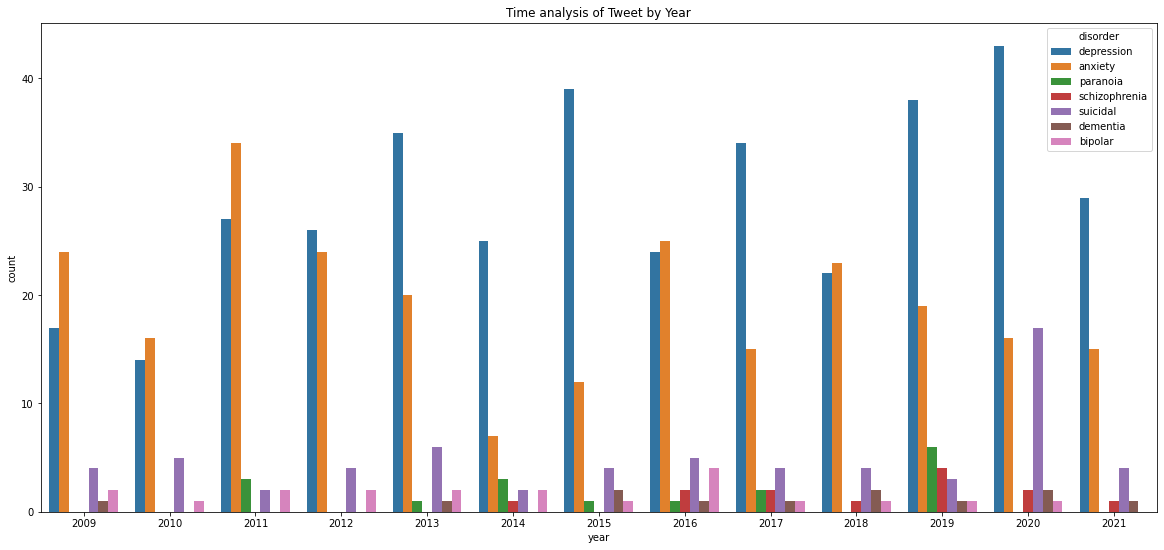

In [ ]:
plt.figure(figsize = (20,9))
plt.title('Time analysis of Tweet by Year')
x = df.year

sns.countplot(df.year.astype('category'), hue = df.disorder )
plt.show()

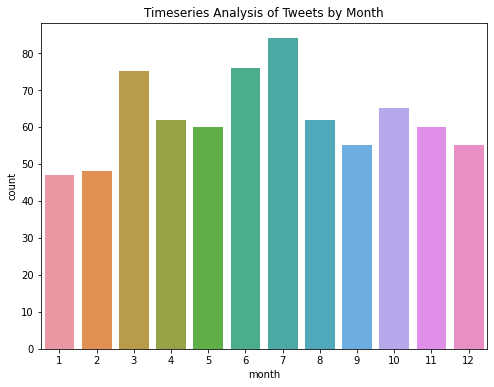

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = df.month)
plt.title('Timeseries Analysis of Tweets by Month')
plt.show()


In [ ]:
# We need to remove some unnecessary column that will not help with classification. 
unnecessary = ['created_at', 'year', 'month']
df.drop(unnecessary, axis=1, inplace=True)
df.head()

,tweet,disorder
0,"@CarolRadull Caroll I love Manchester United, ...",depression
1,@realmadriden Come and rescue from depression ...,depression
2,"In USA you see names like Bush, Stone yet they...",depression
3,"""Cool head"" aftermath, what a hell is wrong wi...",depression
4,@Arsenal just imagining 9 months of this and d...,depression


In [ ]:
df.disorder.value_counts()

depression       373
anxiety          250
suicidal          64
bipolar           20
paranoia          17
schizophrenia     13
dementia          12
Name: disorder, dtype: int64

In [ ]:
# We need to labelEncode the data. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['disorder'] = le.fit_transform(df.disorder)
df.sample (5)

,tweet,disorder
490,I know it’s hard to sleep when you can’t find ...,0
134,"Depression is not always obvious, depression ...",3
445,Emotions like anxiety and fear have their root...,0
37,My boy will go into depression haha,3
512,True and Authentic Bible Faith has no Room for...,0


- depression = 3
- anxiety     0
- suicidal    6
- bipolar     1
- paranoia    4
- schizophrenia 5 
- dementia      2

In [ ]:
#1. WORD-COUNT
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
print(df[df['disorder']==0]['word_count'].mean()) 
print(df[df['disorder']==1]['word_count'].mean()) 
print(df[df['disorder']==2]['word_count'].mean()) 
print(df[df['disorder']==3]['word_count'].mean()) 
print(df[df['disorder']==4]['word_count'].mean()) 
print(df[df['disorder']==5]['word_count'].mean()) 
print(df[df['disorder']==6]['word_count'].mean()) 
print('***'*30)
#tweets on depression are more wordy than the othermental health-categories tweets

#2. CHARACTER-COUNT
df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))
print(df[df['disorder']==0]['char_count'].mean()) #Depression tweets
print(df[df['disorder']==1]['char_count'].mean())
print(df[df['disorder']==2]['char_count'].mean())
print(df[df['disorder']==3]['char_count'].mean())
print(df[df['disorder']==4]['char_count'].mean())
print(df[df['disorder']==5]['char_count'].mean())
print(df[df['disorder']==6]['char_count'].mean())
print('***'*30) 
#Depression tweets are longer than the other tweets

#3. UNIQUE WORD-COUNT
df['unique_word_count'] = df['tweet'].apply(lambda x: len(set(str(x).split())))
print(df[df['disorder']==0]['unique_word_count'].mean()) #Depression tweets
print(df[df['disorder']==1]['unique_word_count'].mean()) #other tweets
print(df[df['disorder']==2]['unique_word_count'].mean())
print(df[df['disorder']==3]['unique_word_count'].mean())
print(df[df['disorder']==4]['unique_word_count'].mean())
print(df[df['disorder']==5]['unique_word_count'].mean())
print(df[df['disorder']==6]['unique_word_count'].mean())

16.372
14.85
16.916666666666668
15.715817694369973
16.823529411764707
13.923076923076923
15.171875
******************************************************************************************
108.796
107.55
119.08333333333333
110.00268096514745
114.76470588235294
110.3076923076923
103.0625
******************************************************************************************
15.668
14.2
15.916666666666666
15.09651474530831
16.0
13.76923076923077
14.515625


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def remove_stopwords(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_tweet'] = df['tweet'].apply(lambda x: remove_stopwords(x))
df.head()

,tweet,disorder,word_count,char_count,unique_word_count,clean_tweet
0,"@CarolRadull Caroll I love Manchester United, ...",3,15,102,15,carolradull caroll love manchester united arse...
1,@realmadriden Come and rescue from depression ...,3,9,60,9,realmadriden come rescue depression arsenal
2,"In USA you see names like Bush, Stone yet they...",3,23,140,23,usa see name like bush stone yet progress afri...
3,"""Cool head"" aftermath, what a hell is wrong wi...",3,21,140,21,cool head aftermath hell wrong arteta ready de...
4,@Arsenal just imagining 9 months of this and d...,3,10,62,10,arsenal imagining month damn depression


In [ ]:
df.info()
# df_train['clean_text'] = df_train['clean_text'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet              749 non-null    object
 1   disorder           749 non-null    int64 
 2   word_count         749 non-null    int64 
 3   char_count         749 non-null    int64 
 4   unique_word_count  749 non-null    int64 
 5   clean_tweet        749 non-null    object
dtypes: int64(4), object(2)
memory usage: 35.2+ KB


In [ ]:
df

,tweet,disorder,word_count,char_count,unique_word_count,clean_tweet
0,"@CarolRadull Caroll I love Manchester United, ...",3,15,102,15,carolradull caroll love manchester united arse...
1,@realmadriden Come and rescue from depression ...,3,9,60,9,realmadriden come rescue depression arsenal
2,"In USA you see names like Bush, Stone yet they...",3,23,140,23,usa see name like bush stone yet progress afri...
3,"""Cool head"" aftermath, what a hell is wrong wi...",3,21,140,21,cool head aftermath hell wrong arteta ready de...
4,@Arsenal just imagining 9 months of this and d...,3,10,62,10,arsenal imagining month damn depression
...,...,...,...,...,...,...
744,the anne hathaway episode is so sad and trigge...,1,26,139,25,anne hathaway episode sad trigger dont bipolar...
745,"""My mom was diagnosed with bipolar schizophren...",1,20,140,20,mom diagnose bipolar schizophrenia didnt talk ...
746,@ChiromoHospGrp @Kasungwa_ @WillisRaburu @Auth...,1,10,136,10,chiromohospgrp kasungwa willisraburu authorque...
747,@shackyll @_fels1 Wtf? I tell you I'm avoiding...,1,23,140,21,shackyll fels wtf tell avoid bipolar nature re...


In [ ]:
df1 = df.copy(deep=True)
df1.head()

,tweet,disorder,word_count,char_count,unique_word_count,clean_tweet
0,"@CarolRadull Caroll I love Manchester United, ...",3,15,102,15,carolradull caroll love manchester united arse...
1,@realmadriden Come and rescue from depression ...,3,9,60,9,realmadriden come rescue depression arsenal
2,"In USA you see names like Bush, Stone yet they...",3,23,140,23,usa see name like bush stone yet progress afri...
3,"""Cool head"" aftermath, what a hell is wrong wi...",3,21,140,21,cool head aftermath hell wrong arteta ready de...
4,@Arsenal just imagining 9 months of this and d...,3,10,62,10,arsenal imagining month damn depression


In [ ]:
import random

random.seed(100)

df_test = df1.sample(100, random_state = 42)
df_test

,tweet,disorder,word_count,char_count,unique_word_count,clean_tweet
581,All the fears and anxiety of Tigrayans living ...,0,22,140,20,fear anxiety tigrayans live eth state sadly co...
356,@sav_bmancman @3dLooks Haaa...Depression spend...,3,5,75,5,sav bmancman dlooks haaa depression spending h...
133,Depression is a mood disorder. It is the feeli...,3,21,139,18,depression mood disorder feel sadness nothing ...
250,We ask God to take away all the things not mea...,3,22,140,22,ask god take away thing mean u get angry surpr...
299,@Ngendo87 This is what I think of everytime am...,3,12,71,11,ngendo think everytime alone depression real
...,...,...,...,...,...,...
333,@amerix 🙄🙄🙄 I suffer from depression and your ...,3,11,67,11,amerix suffer depression tweet unhelpful
660,How can Uhuru support a person who didn't supp...,6,23,140,20,uhuru support person support dump deputy willi...
286,"@kevoprince_ Drugs , depression , death ...the...",3,22,126,21,kevoprince drug depression death first two may...
118,employment the result is brilliant minds will ...,3,21,140,20,employment result brilliant mind end hacker th...


In [ ]:
drop_idx = df_test.index
df1.drop(drop_idx, axis = 0, inplace=True)


In [ ]:
df1.shape

(649, 6)

In [ ]:

# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df1['clean_tweet_tok']=[nltk.word_tokenize(i) for i in df1['clean_tweet']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df1['clean_tweet_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
# We first split the data into training and testing set. 


X_train, X_val, y_train, y_val = train_test_split(df1["clean_tweet"], 
                                                  df1["disorder"],
                                                  test_size=0.33,
                                                  shuffle=True)

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec # X_train

X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec # X_test

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
#
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
#

# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
#
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [ ]:
X_train.shape

(434,)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76        73
           1       1.00      0.29      0.44         7
           2       1.00      0.33      0.50         3
           3       0.64      0.92      0.75        99
           4       1.00      0.14      0.25         7
           5       0.00      0.00      0.00         5
           6       0.86      0.57      0.69        21

    accuracy                           0.72       215
   macro avg       0.77      0.42      0.48       215
weighted avg       0.76      0.72      0.70       215

Confusion Matrix: [[48  0  0 25  0  0  0]
 [ 0  2  0  5  0  0  0]
 [ 0  0  1  2  0  0  0]
 [ 6  0  0 91  0  0  2]
 [ 0  0  0  6  1  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  9  0  0 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


depression = 3
anxiety 0
suicidal 6
bipolar 1
paranoia 4
schizophrenia 5
dementia 2

In [ ]:
df_test.columns

Index(['tweet', 'disorder', 'word_count', 'char_count', 'unique_word_count',
       'clean_tweet'],
      dtype='object')

In [ ]:
# Perform prediction on the test dataset by first setting it to X_test
X_test=df_test['clean_tweet'] 

# Text to vector
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]

# Create a probability column on the test dataframe
df_test['predict_prob']= y_prob

# Create a target column on the test dataframe which will include the predicted mental health categories 
df_test['target']= y_predict
print(df_test.head())


                                                 tweet  ...  target
581  All the fears and anxiety of Tigrayans living ...  ...       0
356  @sav_bmancman @3dLooks Haaa...Depression spend...  ...       3
133  Depression is a mood disorder. It is the feeli...  ...       3
250  We ask God to take away all the things not mea...  ...       3
299  @Ngendo87 This is what I think of everytime am...  ...       3

[5 rows x 8 columns]


In [ ]:
# preview columns for the test dataframe
df_test.columns

Index(['tweet', 'disorder', 'word_count', 'char_count', 'unique_word_count',
       'clean_tweet', 'predict_prob', 'target'],
      dtype='object')

In [ ]:
# Create a copy of the test dataframe then drop unnecessary columns
df_test_copy = df_test.copy(deep=True)

# columns to drop
drop_columns = ['tweet', 'word_count', 'char_count', 'unique_word_count']

# Drop the unnecessary columns
df_test_copy.drop(drop_columns, axis=1, inplace=True)

# Preview the predicted model
df_test_copy

,disorder,clean_tweet,predict_prob,target
581,0,fear anxiety tigrayans live eth state sadly co...,0.010400,0
356,3,sav bmancman dlooks haaa depression spending h...,0.003850,3
133,3,depression mood disorder feel sadness nothing ...,0.014298,3
250,3,ask god take away thing mean u get angry surpr...,0.008400,3
299,3,ngendo think everytime alone depression real,0.005197,3
...,...,...,...,...
333,3,amerix suffer depression tweet unhelpful,0.005110,3
660,6,uhuru support person support dump deputy willi...,0.007214,6
286,3,kevoprince drug depression death first two may...,0.006080,3
118,3,employment result brilliant mind end hacker th...,0.008843,3


We will now use Neural Networks to create a predictive model for the mental health categories